In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('breast.csv')
df.head()
df.index
df.columns
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [35]:
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(df.index),50))
m=np.transpose(noise)
for i in range(0,50):
    str1="noise"+str(i)
    df[str1]=pd.DataFrame(m[i])

In [42]:
df.columns
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,noise0,noise1,noise2,noise3,...,noise40,noise41,noise42,noise43,noise44,noise45,noise46,noise47,noise48,noise49
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417,0.040778,-0.019685,-0.010531,0.014955,...,-0.065237,0.044116,-0.001549,-0.016577,-0.001655,-0.024644,0.025526,0.021939,-0.025275,-0.043277
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918,1.002729,0.951125,1.030106,0.932013,...,0.988520,0.995094,0.999778,0.982266,1.018062,0.998792,1.013228,1.027236,1.022111,0.916221
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000,-3.836656,-2.896255,-3.334893,-2.993707,...,-3.221016,-2.921350,-2.953823,-2.966753,-3.655087,-2.630730,-2.696887,-3.033989,-3.055709,-2.605577
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000,-0.587856,-0.718598,-0.731633,-0.646358,...,-0.709580,-0.596772,-0.651287,-0.643183,-0.705756,-0.709843,-0.652598,-0.725623,-0.697330,-0.705985
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000,0.021889,-0.008414,-0.043633,0.051198,...,-0.019530,0.029135,-0.039307,-0.004252,0.033650,-0.004348,0.037092,-0.015547,0.032115,-0.031396
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000,0.757056,0.569302,0.674299,0.683415,...,0.588077,0.719599,0.650201,0.611413,0.707106,0.672453,0.687066,0.723880,0.676357,0.581782
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000,2.938188,3.942331,2.637882,2.753230,...,2.930320,3.529055,2.642910,4.479084,3.186575,3.926238,3.285724,3.215374,3.377383,2.589564


In [37]:
Y=df[['diagnosis']]
X=df.drop('diagnosis',axis=1)
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,noise0,noise1,noise2,noise3,noise4,...,noise40,noise41,noise42,noise43,noise44,noise45,noise46,noise47,noise48,noise49
0,17.99,10.38,122.80,1001.0,0.11840,0.496714,-0.138264,0.647689,1.523030,-0.234153,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
1,20.57,17.77,132.90,1326.0,0.08474,0.324084,-0.385082,-0.676922,0.611676,1.031000,...,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587
2,19.69,21.25,130.00,1203.0,0.10960,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,...,0.227460,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985
3,11.42,20.38,77.58,386.1,0.14250,0.250493,0.346448,-0.680025,0.232254,0.293072,...,-0.446515,0.856399,0.214094,-1.245739,0.173181,0.385317,-0.883857,0.153725,0.058209,-1.142970
4,20.29,14.34,135.10,1297.0,0.10030,0.357787,0.560785,1.083051,1.053802,-1.377669,...,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982


In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=.35)

[ True  True  True  True  True False False False  True False  True  True
  True False  True False  True False  True False False False  True False
 False False  True False False  True False False False  True False  True
 False False False False  True  True  True  True False  True False  True
  True False False False  True  True  True]


f:\new folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(200, 1)

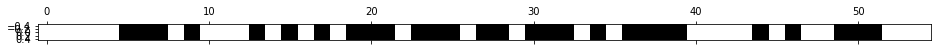

In [54]:
select=SelectPercentile(percentile=50)
select.fit(X_train,Y_train)
X_feature=select.transform(X_train)
X_train.shape
X_feature.shape
mask=select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray')
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape


In [46]:
columns = np.asarray(X.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]
columns_with_support

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'noise3', 'noise5', 'noise6', 'noise7', 'noise9',
       'noise11', 'noise13', 'noise17', 'noise21', 'noise24', 'noise28',
       'noise30', 'noise35', 'noise36', 'noise37', 'noise38', 'noise40',
       'noise42', 'noise43', 'noise47', 'noise48', 'noise49'], dtype=object)

In [60]:
X_test_selected=select.transform(X_test)
lg=LogisticRegression()
lg.fit(X_train,Y_train)
print("Without feture selection {}".format(lg.score(X_test,Y_test)))

Without feture selection 0.905


f:\new folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
Y_test.shape
X_test_selected.shape

(200, 27)

In [61]:
lg.fit(X_feature,Y_train)
print("With feture selection {}".format(lg.score(X_test_selected,Y_test)))

With feture selection 0.915


f:\new folder\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
